<a href="https://colab.research.google.com/github/meheroob/ba_data_analysis/blob/main/ba_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install beautifulsoup4

In [2]:
# pip install lxml

In [3]:
from bs4 import BeautifulSoup

In [4]:
import requests

In [5]:
all_reviews = []
all_ratings = []

# loop through all pages (We are considering latest 1000 reviews)
for page_num in range(1, 11):
    url = f'https://www.airlinequality.com/airline-reviews/british-airways/page/{page_num}/?sortby=post_date%3ADesc&pagesize=100'
    source = requests.get(url).text
    soup = BeautifulSoup(source, 'lxml')
    
    # find all divs containing reviews
    review_divs = soup.find_all('div', class_='body')
    ratings = soup.find_all('article')
    
    # loop through all review divs on this page and extract the review text
    for review_div in review_divs:
        review_text = review_div.find('div', class_='text_content').text.strip()
        review_text = review_text.split('|')[1]
        all_reviews.append(review_text)
    
    for rating in ratings:
        r = rating.find('span').text.strip()
        all_ratings.append(r)

In [6]:
all_ratings_new = []

In [7]:
for i in all_ratings:
    try:
      j = int(i)
      all_ratings_new.append(j)
    except:
      pass

In [8]:
import nltk
nltk.download('stopwords')
import gensim
from gensim import corpora
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pandas as pd

# Define the reviews and ratings lists
reviews = all_reviews.copy()  # Your list of reviews
ratings = all_ratings_new.copy()  # Your list of ratings

# Preprocess the reviews

# Define the stop words
stop_words = stopwords.words('english')

# Define the Porter stemmer
porter_stemmer = PorterStemmer()

# Preprocess each review
processed_reviews = []
for review in reviews:
    # Remove punctuation marks and numbers
    review = re.sub('[^A-Za-z]+', ' ', review)
    
    # Convert to lowercase
    review = review.lower()
    
    # Remove stop words
    review = [word for word in review.split() if word not in stop_words]
    
    # Stem the words
    review = [porter_stemmer.stem(word) for word in review]
    
    # Add the processed review to the list
    processed_reviews.append(review)

# Create a dictionary and a corpus from the processed reviews
dictionary = corpora.Dictionary(processed_reviews)
corpus = [dictionary.doc2bow(review) for review in processed_reviews]

# Perform topic modeling using LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=10,
                                            passes=10)

# Get the topic distribution for each review
topic_distribution = []
for i, review in enumerate(processed_reviews):
    # Get the topic distribution for the review
    distribution = lda_model.get_document_topics(corpus[i])
    
    # Sort the topic distribution by probability (descending order)
    distribution = sorted(distribution, key=lambda x: x[1], reverse=True)
    
    # Get the topic with the highest probability
    top_topic = distribution[0][0]
    
    # Append the top topic to the list
    topic_distribution.append(top_topic)

# Create a dataframe with the reviews and their corresponding topic numbers
df = pd.DataFrame({'Review': reviews, 'Topic': topic_distribution})




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df

,Review,Topic
0,They changed our Flights from Brussels to Lo...,2
1,At Copenhagen the most chaotic ticket counte...,3
2,Worst experience of my life trying to deal w...,4
3,Due to code sharing with Cathay Pacific I wa...,2
4,LHR check in was quick at the First Wing and...,3
...,...,...
995,Linate to London. The morning of the departu...,7
996,Flew British Airways from JK to London Heathr...,0
997,I have flown British Airways numerous times o...,9
998,We can not fault the new 'Club World' food an...,4


In [10]:
print("Top 10 Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"\nTopic {idx+1}:")
    words = topic.split("+")
    for word in words:
        print(f"{word.strip()}")

Top 10 Topics:

Topic 1:
0.022*"ba"
0.015*"staff"
0.009*"board"
0.009*"heathrow"
0.009*"flight"
0.008*"london"
0.007*"plane"
0.007*"airway"
0.007*"servic"
0.007*"british"

Topic 2:
0.011*"flight"
0.011*"london"
0.010*"staff"
0.010*"ba"
0.009*"cabin"
0.008*"seat"
0.007*"one"
0.006*"back"
0.006*"servic"
0.005*"check"

Topic 3:
0.024*"seat"
0.013*"flight"
0.012*"book"
0.010*"ba"
0.009*"get"
0.008*"economi"
0.007*"one"
0.007*"time"
0.007*"go"
0.007*"could"

Topic 4:
0.031*"flight"
0.031*"ba"
0.015*"busi"
0.013*"seat"
0.012*"class"
0.012*"servic"
0.009*"one"
0.009*"time"
0.008*"hour"
0.007*"airlin"

Topic 5:
0.027*"flight"
0.022*"seat"
0.011*"cabin"
0.010*"servic"
0.009*"time"
0.009*"ba"
0.009*"crew"
0.009*"food"
0.009*"class"
0.007*"good"

Topic 6:
0.029*"flight"
0.013*"servic"
0.012*"london"
0.012*"check"
0.010*"delay"
0.009*"hour"
0.009*"crew"
0.009*"time"
0.008*"ba"
0.008*"board"

Topic 7:
0.030*"flight"
0.016*"good"
0.015*"servic"
0.013*"crew"
0.013*"ba"
0.012*"seat"
0.011*"food"
0.010

In [11]:
pip install pyLDAvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pyLDAvis.gensim
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # ignore DeprecationWarning from pyLDAvis

# create the visualization
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

# display the visualization
pyLDAvis.display(vis)


/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [13]:
ratings_count = []
for i in range(0,10):
    k = all_ratings_new.count(i+1)
    ratings_count.append(k)

In [14]:
above_5_stars = 0
below_5_stars = 0

for i in range(0, 10):
    if i<=4:
        below_5_stars += ratings_count[i]
    else:
        above_5_stars += ratings_count[i]

In [15]:
above_and_below = [below_5_stars, above_5_stars]

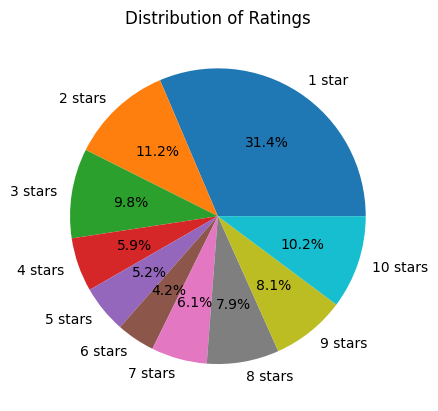

In [16]:
import matplotlib.pyplot as plt

labels = ['1 star', '2 stars', '3 stars', '4 stars', '5 stars', '6 stars', '7 stars', '8 stars', '9 stars' , '10 stars']
plt.pie(ratings_count, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()



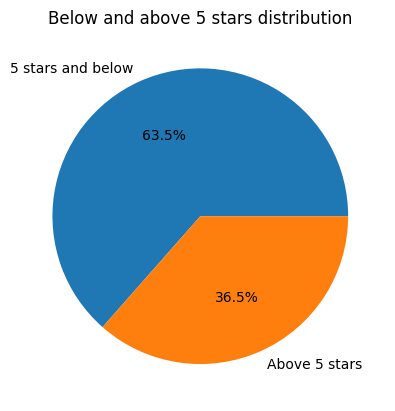

In [17]:
labels = ['5 stars and below', 'Above 5 stars']
plt.pie(above_and_below, labels=labels, autopct='%1.1f%%')
plt.title('Below and above 5 stars distribution')
plt.show()

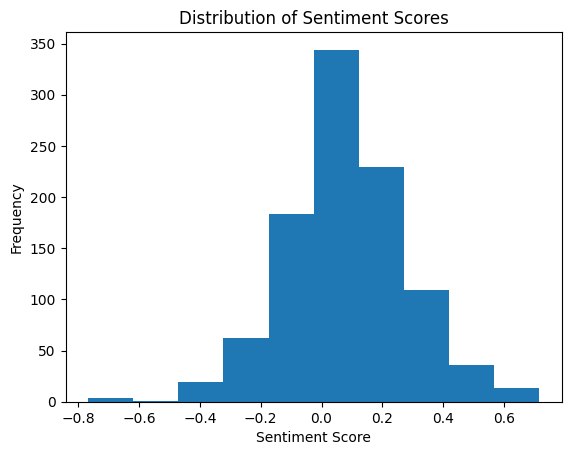

In [18]:
from textblob import TextBlob

# create a list to hold the sentiment scores
sentiment_scores = []

# loop through each review and get the sentiment score
for review in reviews:
    blob = TextBlob(review)
    sentiment_scores.append(blob.sentiment.polarity)


plt.hist(sentiment_scores)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')

plt.show()
